                                  Réalisé par IBENJELLAL ASSOU SAMIR (115593) TP'C'

In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 963.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 12.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 7.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.0 MB/s eta

In [9]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from tensorflow.keras.preprocessing import image
from PIL import Image 
from IPython.display import display


%matplotlib inline

# Training:

In [10]:
tf.keras.backend.set_image_data_format('channels_last')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train / 255.
x_test = x_test / 255.

# Define the labels for the binary classification
def convert_to_binary_class(y):
    # Classes 0 (airplane) and 2 (bird) can fly, all others cannot
    return np.where(np.isin(y, [0, 2]), 1, 0)

y_train_binary = convert_to_binary_class(y_train)
y_test_binary = convert_to_binary_class(y_test)

print(x_train.shape, y_train_binary.shape, x_test.shape, y_test_binary.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Images of objects that can fly:


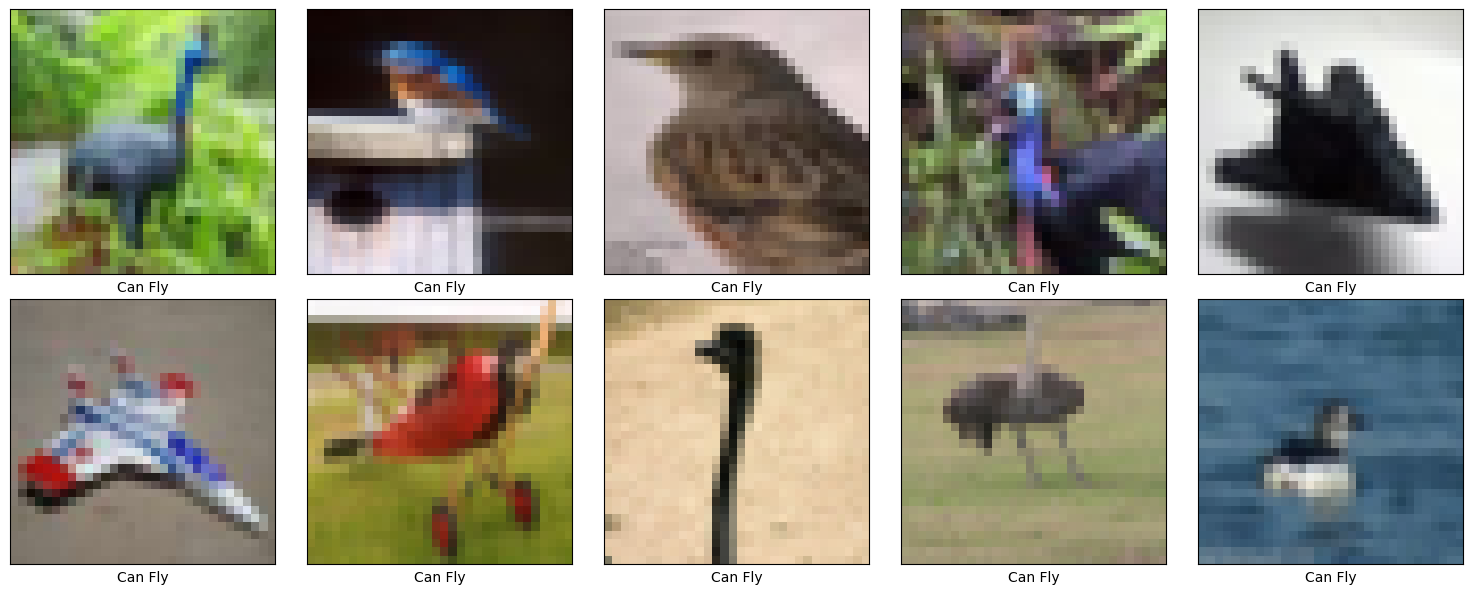

Images of objects that cannot fly:


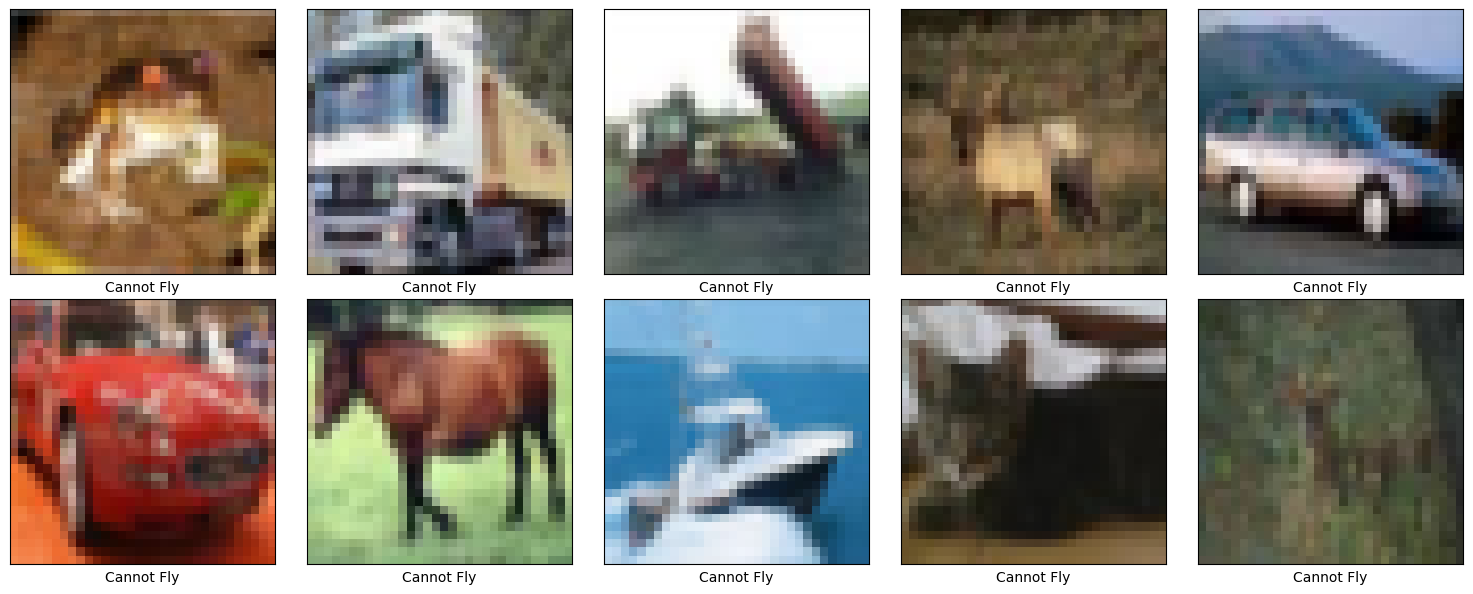

In [11]:
def plot_images_by_category(images, labels, binary_labels, category, num_rows=2, num_cols=5):
    plt.figure(figsize=(15, 6))
    indices = np.where(binary_labels == category)[0]
    for i in range(min(num_rows * num_cols, len(indices))):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[indices[i]], interpolation='nearest')
        plt.xlabel('Can Fly' if category == 1 else 'Cannot Fly')
    plt.tight_layout()
    plt.show()

# Plot images for the 'can fly' category
print("Images of objects that can fly:")
plot_images_by_category(x_train, y_train, y_train_binary, category=1)

# Plot images for the 'cannot fly' category
print("Images of objects that cannot fly:")
plot_images_by_category(x_train, y_train, y_train_binary, category=0)

In [12]:
# Fit a CNN having the following architecture:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
#LeakyRelu is an activation function that is partially similar to Relu function, 
    #but instead of returning zero for negative inputs, it returns a small negative value.
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

   
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.005), 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 22,945 (89.63 KB)

 Non-trainable params: 288 (1.12 KB)

None


In [13]:
training = model.fit(x_train, y_train_binary, epochs=100, batch_size=32, validation_split=0.15)

Epoch 1/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.7840 - loss: 0.4915 - val_accuracy: 0.8077 - val_loss: 0.4665
Epoch 2/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.8284 - loss: 0.4035 - val_accuracy: 0.8232 - val_loss: 0.4090
Epoch 3/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.8410 - loss: 0.3794 - val_accuracy: 0.8372 - val_loss: 0.3809
Epoch 4/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.8472 - loss: 0.3671 - val_accuracy: 0.8465 - val_loss: 0.3664
Epoch 5/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.8508 - loss: 0.3593 - val_accuracy: 0.8375 - val_loss: 0.4041
Epoch 6/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.8557 - loss: 0.3484 - val_accuracy: 0.8589 - val_loss: 0.3539
Epoch 7/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8582 - loss: 0.3416 - val_accuracy: 0.8108 - val_loss: 0.6233
Epoch 8/100
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.9112
Precision: 0.8192
Recall: 0.7135
F1 Score: 0.7627
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8000
           1       0.82      0.71      0.76      2000

    accuracy                           0.91     10000
   macro avg       0.87      0.84      0.85     10000
weighted avg       0.91      0.91      0.91     10000



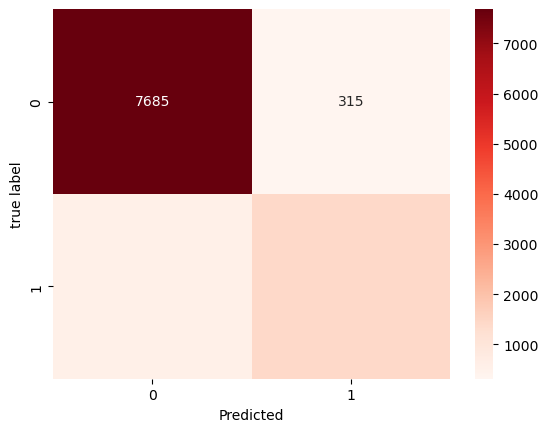

In [14]:
# Make predictions on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute accuracy, precision, recall, and F1 score
acc = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Print the metrics
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print(classification_report(y_test_binary, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('true label')
plt.show()

# Testing part:

In [15]:
#loading the images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype(np.float32) / 255.0
    return img_array

def predict_image_class(model, img_array):
    prediction = model.predict(img_array)
    if prediction > 0.5:
        return "Can Fly"
    else:
        return "Cannot Fly"



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The object in the image: Can Fly


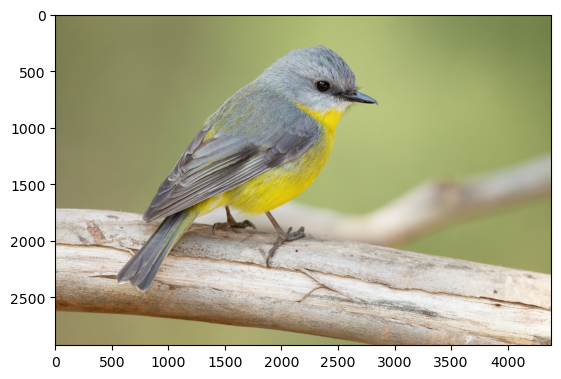

In [40]:
# Load and preprocess the new image
img_path1 = 'Bird.jpg'  
img_array1 = load_and_preprocess_image(img_path1)

# Predict the class of the new image
prediction1 = predict_image_class(model, img_array1)
print("The object in the image:", prediction)


import matplotlib.image as mpimg

img1 = mpimg.imread('Bird.jpg')
imgplot1 = plt.imshow(img1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The object in the image: Can Fly


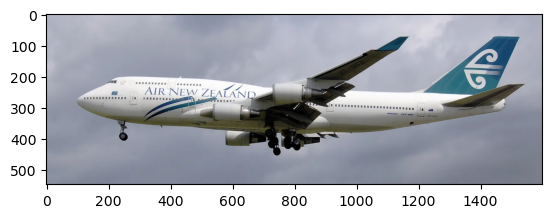

In [43]:
# Load and preprocess the new image
img_path2 = 'airplane.webp'  
img_array2 = load_and_preprocess_image(img_path2)

# Predict the class of the new image
prediction2 = predict_image_class(model, img_array2)
print("The object in the image:", prediction2)

img2 = mpimg.imread('airplane.webp')
imgplot2 = plt.imshow(img2)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The object in the image: Cannot Fly


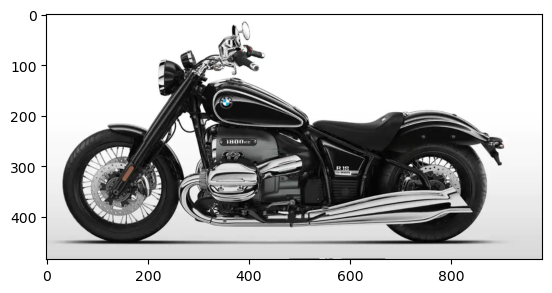

In [44]:
# Load and preprocess the new image
img_path3 = 'motorcycle.png'  
img_array3 = load_and_preprocess_image(img_path3)

# Predict the class of the new image
prediction3 = predict_image_class(model, img_array3)
print("The object in the image:", prediction3)

img3 = mpimg.imread('motorcycle.png')
imgplot3 = plt.imshow(img3)
plt.show()